In [ ]:
# Maya Purnama Sari
# 24083010074
# Tugas Github 4 makanan

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
NPM = 10074
np.random.seed(NPM)

# === LOAD DATA ===
from google.colab import files
upload = files.upload ()


Saving makanan.xlsx to makanan (1).xlsx



No1
(1) Jumlah sampel dengan kesehatan kumulatif positif: 500
    Menu paling sering muncul pada sampel sehat (Top 10):
     1. Tumis Wortel + Telur         | frek: 658
     2. Salad Buah + Yogurt          | frek: 657
     3. Tumis wortel + Telur         | frek: 656
     4. Tahu tek                     | frek: 655
     5. Soto Daging                  | frek: 650
     6. Nasi Ayam Panggang           | frek: 648
     7. Ayam Penyet                  | frek: 646
     8. Nasi Goreng                  | frek: 642
     9. Sate Ayam + Lontong          | frek: 642
    10. Salad Buah + susu            | frek: 639

No2
(2) Jumlah sampel sehat dengan sisa uang positif: 0
    Tidak ada sampel yang sekaligus sehat dan sisa uangnya positif.

No3
(3) Sampel skor kumulatif terbesar (kesehatan positif): #236 | Skor=126.743 | Sehat=20.330 | Sisa=Rp-208,400

No4

=== JADWAL MAKAN (Sampel #236) ===
Hari 01 - Pagi : Salad Buah + Susu         (Rp18,000) | Malam : Nasi padang               (Rp25,000)
Hari 02 

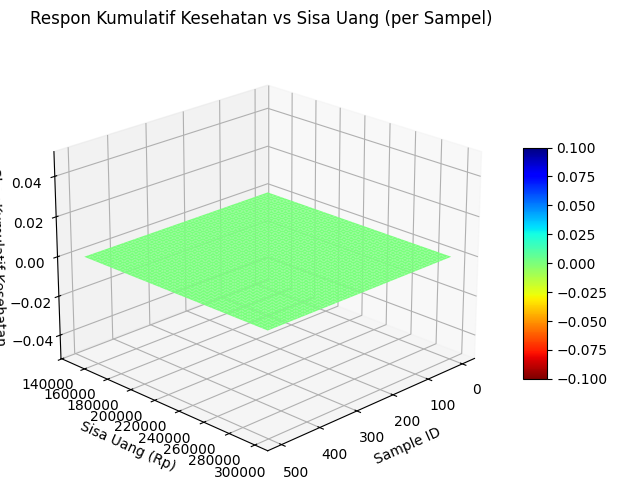

In [10]:
# mohon ditambahkan (lagi) agar lebih beragam
req_cols = {"makanan", "harga", "kenyang", "rasa", "sehat", "bosan"}
if req_cols.issubset(set(makan.columns)):
    tambahan = pd.DataFrame([
        ["Nasi Ayam kari",     20000, 0.75, 0.80, 0.85, 0.25],
        ["Nasi padang",     25000, 0.65, 0.75, 0.90, 0.30],
        ["Soto Daging",              20000, 0.70, 0.85, 0.70, 0.35],
        ["Tahu tek ",              12000, 0.60, 0.80, 0.80, 0.30],
        ["Nasi Goreng",            15000, 0.80, 0.75, 0.55, 0.80],
        ["ayam Bakar + Nasi",      27000, 0.78, 0.88, 0.82, 0.28],
        ["Salad Buah + susu",    17000, 0.75, 0.85, 0.95, 0.10],
        ["Tumis wortel + Telur",  18000, 0.70, 0.75, 0.88, 0.35],
        ["Sate Daging+ Lontong",    25000, 0.85, 0.80, 0.55, 0.30],
        ["Salad Sayur + Kewpie",    16000, 0.75, 0.65, 0.93, 0.25],
    ], columns=["makanan","harga","kenyang","rasa","sehat","bosan"])
    makan = pd.concat([makan, tambahan], ignore_index=True)

# === SANITASI DATA ===
makan['harga'] = (
    makan['harga'].astype(str)
    .str.replace(r'[^0-9.,]', '', regex=True)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
)
makan['harga'] = pd.to_numeric(makan['harga'], errors='coerce')

for c in ['kenyang','rasa','sehat','bosan']:
    makan[c] = pd.to_numeric(makan[c], errors='coerce')

makan = makan.dropna(subset=['makanan','harga','kenyang','rasa','sehat','bosan']).copy()
makan = makan[makan['harga'] > 0].copy()
for c in ['kenyang','rasa','sehat','bosan']:
    makan[c] = makan[c].clip(0,1)

# >>> PENTING: reset index agar iloc dan posisi rapi
makan.reset_index(drop=True, inplace=True)

# === PARAMETER ===
budget = 1e6
wkenyang_base, wrasa_base, wsehat_base, wbosan_base = 0.8, 0.7, 0.9, 0.2
SAMPLE_NUM, HARI, MAKAN_PER_HARI = 500, 31, 2

sampleid = np.arange(SAMPLE_NUM)
skor  = np.zeros(SAMPLE_NUM, float)
sisa  = np.zeros(SAMPLE_NUM, float)
sehat = np.zeros(SAMPLE_NUM, float)
pilihankum = np.zeros(SAMPLE_NUM, float)

SISA_MININUM, SISA_MAKSIMUM = 150e3, 300e3
bin_sisa   = np.arange(SISA_MININUM, SISA_MAKSIMUM, 1000, dtype=int)
resp_sehat = np.zeros((SAMPLE_NUM, len(bin_sisa)), float)
resp_pilih = np.zeros((SAMPLE_NUM, HARI*MAKAN_PER_HARI), float)

# === SIMULASI ===
for n in range(SAMPLE_NUM):
    bgt = 1e6
    s_kum = 0.0
    s_sehat = 0.0

    for i in range(HARI):
        # makan 1
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(wkenyang_base, 0.2)
        w_rasa    = np.random.normal(wrasa_base,    0.2)
        w_sehat   = np.random.normal(wsehat_base,   0.4)
        w_bosan   = np.random.normal(wbosan_base,   0.2)

        s_kum += (
            w_kenyang * makan['kenyang'].iloc[pilihan]
          + w_rasa    * makan['rasa'].iloc[pilihan]
          + w_sehat   * makan['sehat'].iloc[pilihan]
          - w_bosan   * makan['bosan'].iloc[pilihan]
        )
        s_sehat += makan['sehat'].iloc[pilihan] - 0.5
        bgt     -= makan['harga'].iloc[pilihan]
        resp_pilih[n][2*i] = pilihan

        # makan 2
        pilihan = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(wkenyang_base,   0.2)
        w_rasa    = np.random.normal(wrasa_base,      0.2)
        w_sehat   = np.random.normal(wsehat_base+0.2, 0.4)
        w_bosan   = np.random.normal(wbosan_base*2,   0.2)

        s_kum += (
            w_kenyang * makan['kenyang'].iloc[pilihan]
          + w_rasa    * makan['rasa'].iloc[pilihan]
          + w_sehat   * makan['sehat'].iloc[pilihan]
          - w_bosan   * makan['bosan'].iloc[pilihan]
        )
        s_sehat += makan['sehat'].iloc[pilihan] - 0.5
        bgt     -= makan['harga'].iloc[pilihan]
        resp_pilih[n][2*i+1] = pilihan

    sisa[n], skor[n], sehat[n] = bgt, s_kum, s_sehat

    if np.isfinite(bgt):
        idx = int(np.floor((bgt - SISA_MININUM)/1000))
        if 0 <= idx < resp_sehat.shape[1]:
            resp_sehat[n][idx] = s_sehat

# === PLOT 3D ===
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(projection='3d')
Y, X = np.meshgrid(bin_sisa, sampleid)
surf = ax.plot_surface(X, Y, resp_sehat, cmap='jet_r', edgecolor='none')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
ax.set_title("Respon Kumulatif Kesehatan vs Sisa Uang (per Sampel)")
ax.set_xlabel("Sample ID")
ax.set_ylabel("Sisa Uang (Rp)")
ax.set_zlabel("Skor Kumulatif Kesehatan")
ax.view_init(elev=22, azim=45)

# === TUGAS ===

# (4) siapkan utilitas tampilkan jadwal (kalau belum ada)
def tampilkan_jadwal(n_idx):
    if n_idx is None:
        print("\nTidak ada jadwal karena tidak ada sampel sehat.")
        return
    print(f"\n=== JADWAL MAKAN (Sampel #{n_idx}) ===")
    total_biaya = 0.0
    for h in range(HARI):
        pagi_idx  = int(resp_pilih[n_idx][2*h])
        malam_idx = int(resp_pilih[n_idx][2*h+1])

        # guard indeks
        if not (0 <= pagi_idx < len(makan) and 0 <= malam_idx < len(makan)):
            continue

        nama_pagi   = str(makan['makanan'].iloc[pagi_idx])
        harga_pagi  = float(makan['harga'].iloc[pagi_idx])
        nama_malam  = str(makan['makanan'].iloc[malam_idx])
        harga_malam = float(makan['harga'].iloc[malam_idx])
        total_biaya += (harga_pagi + harga_malam)

        print(f"Hari {h+1:02d} - Pagi : {nama_pagi:25s} (Rp{int(harga_pagi):,}) | "
              f"Malam : {nama_malam:25s} (Rp{int(harga_malam):,})")

    print(f"Total biaya 31 hari (estimasi): Rp{int(total_biaya):,}")
    print(f"Sisa uang: Rp{int(sisa[n_idx]):,}")
    print(f"Skor kumulatif: {skor[n_idx]:.3f} | Skor sehat: {sehat[n_idx]:.3f}")

# (1) cari pola makan mana saja yang menghasilkan nilai kumulatif kesehatan (resp_sehat) positif
print("\nNo1")
sampel_sehat = np.where(sehat > 0)[0]
print(f"(1) Jumlah sampel dengan kesehatan kumulatif positif: {len(sampel_sehat)}")

# Pola makan = menu yang paling sering muncul pada sampel sehat
if len(sampel_sehat) > 0:
    pilihan_sehat = resp_pilih[sampel_sehat].astype(int).ravel()
    pilihan_sehat = pilihan_sehat[(pilihan_sehat >= 0) & (pilihan_sehat < len(makan))]
    frek = np.bincount(pilihan_sehat, minlength=len(makan))
    topk = 10
    top_idx = np.argsort(-frek)[:topk]
    print(f"    Menu paling sering muncul pada sampel sehat (Top {topk}):")
    for i, idxm in enumerate(top_idx, 1):
        if frek[idxm] > 0:
            print(f"    {i:2d}. {makan['makanan'].iloc[idxm]:28s} | frek: {int(frek[idxm])}")
else:
    print("    Tidak ada sampel sehat, jadi tidak ada pola makan yang bisa diekstrak.")

# (2) cari titik-titik dengan sisa uang bulanan positif dari (1)
print("\nNo2")
mask_sisa_pos = sisa > 0
sampel_sehat_dan_sisa_pos = np.where((sehat > 0) & mask_sisa_pos)[0]
print(f"(2) Jumlah sampel sehat dengan sisa uang positif: {len(sampel_sehat_dan_sisa_pos)}")
if len(sampel_sehat_dan_sisa_pos) > 0:
    sisa_sehat = sisa[sampel_sehat_dan_sisa_pos]
    order = np.argsort(-sisa_sehat)[:5]
    print("    Contoh Top 5 sisa uang terbesar (di antara yang sehat):")
    for r, j in enumerate(order, 1):
        idxs = int(sampel_sehat_dan_sisa_pos[j])
        print(f"    {r}. Sampel #{idxs:3d} | Sisa=Rp{int(sisa[idxs]):,} | Sehat={sehat[idxs]:.3f} | Skor={skor[idxs]:.3f}")
else:
    print("    Tidak ada sampel yang sekaligus sehat dan sisa uangnya positif.")

# (3) cari titik dengan skor skumulatif terbesar (skor) di mana nilai kumulatif kesehatannya positif
print("\nNo3")
if len(sampel_sehat) > 0:
    skor_tmp = np.where(sehat > 0, skor, -np.inf)
    best_idx = int(np.argmax(skor_tmp))
    print(f"(3) Sampel skor kumulatif terbesar (kesehatan positif): #{best_idx} "
          f"| Skor={skor[best_idx]:.3f} | Sehat={sehat[best_idx]:.3f} | Sisa=Rp{int(sisa[best_idx]):,}")
else:
    best_idx = None
    print("(3) Tidak ada sampel dengan kesehatan positif.")

# (4) tampikan jadwal makanan sesuai pilihan (resp_pilih)
print("\nNo4")
tampilkan_jadwal(best_idx)

# (Tambahan) Yang sisa uang TERBESAR di antara yang sehat
print("\ntambahan")
if len(sampel_sehat) > 0:
    sisa_masked = np.where(sehat > 0, sisa, -np.inf)
    idx_sisa_maks = int(np.argmax(sisa_masked))
    print(f"Sampel dengan SISA TERBESAR (sehat>0): #{idx_sisa_maks} "
          f"| Sisa=Rp{int(sisa[idx_sisa_maks]):,} | Sehat={sehat[idx_sisa_maks]:.3f} | Skor={skor[idx_sisa_maks]:.3f}")
else:
    print("Tidak ada sampel sehat untuk dihitung sisa terbesar.")

#NO 1
ada 500 sampel yang memberi nilai kesehatan positif. ada 10 menu yang sering muncul pada sampel sehat (top 10) 1.tumis wortel dengan frek 658 , 2.salad buah dengan frek 657 dll yang bisa dilihat di hasil , dengan kesimpulan menu yang mengandung sayur/olhaan sayur sering muncul pada sampel (sehat) , ada juga item lauk populer (nasi goreng , sate) artinya sering muncul namun bukan selalu berarti sangat sehat : kombinasi / porsi bisa berpengaruh

#NO2
Jumlah sampel yang sehat dan memiliki sisa uang positif = 0
aertinya dari semua sampel yang termasuk sehat , tidak ada yang meninggalkan sisa uang ( semua mengalami defisit terhadap anggaran yang dipakai)

#NO3
sampel #236 - skor total = 126.743 , skor sehat = 20.330 ,sisa = Rp.208,400 jadi sampel ini paling sehat menurut metrik tetapi mengakibatkan defisit - Rp.208.400 ( terlalu mahal diabndingkan anggaran )

#NO4
jadwal berisi 31 hari (pagi & malam) , cukup variatif dan banyak menu sehat (salad,kumis,tumis, ikan ,sayur)
Karena pemilihan menu sehat dan beberapa item mahal , total biaya menyebabkan sisa negatif, Kesimpulan sample 236 dari sisi kesehatan tapi tidak feasible secara biaya dengan anggaran saat ini

Ada sampel lain yang paling “hemat” di antara sampel sehat: Sampel #0 — Sisa = Rp-44,800 (masih negatif), Sehat = 21.300, Skor = 113.886.
Artinya sampel #0 adalah kompromi terbaik sejauh ini: relatif sehat dan paling dekat ke anggaran (paling kecil defisit), walau tetap belum positif.

